In [1]:
from warnings import filterwarnings

filterwarnings('ignore')

In [2]:
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
pp = pprint.PrettyPrinter(indent=4)

In [6]:
df = pd.read_pickle('pickle/df.pkl')

In [7]:
df.head()

,cow_code,state_name,year,num_trade_states,export_dollars,import_dollars,military_expenditure,military_personnel,prim_energy_consumption,total_pop,cinc_score,num_alliances,pre_1816_alliances,num_in_effect_1231_2012,defense_treaties,neutrality_treaties,nonaggression_treaties,entente_treaties,num_conflicts,avg_with,avg_against,avg_cum_duration,num_wars,origin_participant_pct,ongoing_2010,revision_pct,avg_hostility_level,revision_type_mode,outcome_mode,settlement_type_mode,majority_religion,un_region,un_continent,election_type,legislation_type,legislature_status,party_legal_status,party_existance,party_existance_outside_regime,legislature_parties,incumbent_type,collective_leadership,num_leadership_changes,leader_tenure,military_leader,royal_leader,nominal_vs_eff_diff,communist_leader,leader_died,democratic_regime,cabinet_assembly,popular_election,regime_type,transition_to_democracy,transition_to_dictatorship,age_govt,num_transitions_ever
0,2,United States of America,1946,65.00,160000000.00,14.40,45133984000.00,3030000.00,2376288000000.00,141389000.00,0.36,19.00,0.00,0.00,19.00,0.00,0.00,19.00,2.00,1.00,1.50,0.27,0.00,0.50,0.00,0.00,3.50,N/A,Stalemate,None Value,Christianity,Northern America,Americas,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,0.00,2.00,Yes,No,No,No,No,Yes,No,Yes,Presidential democracy,No,No,77.00,0.00
1,651,Egypt,1946,65.00,nan,nan,31998000.00,50000.00,4046000000.00,18792000.00,0.01,7.00,0.00,0.00,0.00,0.00,6.00,7.00,0.00,nan,nan,0.00,0.00,nan,nan,nan,1.00,0,NaN,NaN,Islam,Northern Africa,Africa,Nonelective,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,0.00,11.00,No,Yes,No,No,No,No,No,No,Royal dictatorship,No,No,25.00,0.00
2,135,Peru,1946,65.00,nan,nan,26446000.00,38000.00,2166000000.00,7420000.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,19.00,0.00,nan,nan,0.00,0.00,nan,nan,nan,1.00,0,NaN,NaN,Christianity,South America,Americas,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,0.00,2.00,No,No,No,No,No,Yes,No,Yes,Presidential democracy,No,No,8.00,0.00
3,652,Syria,1946,65.00,nan,nan,14540000.00,10000.00,10000000.00,2978000.00,0.00,6.00,0.00,4.00,0.00,0.00,6.00,6.00,0.00,nan,nan,0.00,0.00,nan,nan,nan,1.00,0,NaN,NaN,Islam,Western Asia,Asia,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,0.00,4.00,No,No,No,No,No,No,No,No,Civilian dictatorship,No,No,1.00,0.00
4,660,Lebanon,1946,65.00,nan,nan,5111000.00,4000.00,16000000.00,1156000.00,0.00,6.00,0.00,4.00,0.00,0.00,6.00,6.00,0.00,nan,nan,0.00,0.00,nan,nan,nan,1.00,0,NaN,NaN,Christianity,Western Asia,Asia,Indirect election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,2.00,1.00,No,No,No,No,No,Yes,No,No,Parliamentary democracy,Yes,No,1.00,0.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9128 entries, 0 to 9127
Data columns (total 57 columns):
cow_code                          9128 non-null int64
state_name                        9128 non-null object
year                              9128 non-null int64
num_trade_states                  8902 non-null float64
export_dollars                    8619 non-null float64
import_dollars                    8605 non-null float64
military_expenditure              8373 non-null float64
military_personnel                8769 non-null float64
prim_energy_consumption           8857 non-null float64
total_pop                         8906 non-null float64
cinc_score                        8906 non-null float64
num_alliances                     9128 non-null float64
pre_1816_alliances                9128 non-null float64
num_in_effect_1231_2012           9128 non-null float64
defense_treaties                  9128 non-null float64
neutrality_treaties               9128 non-null float64
no

In [9]:
# impute for total non-religious
# do any other religion values not make sense as 0?
# use threshold for first non-zero
# maybe a relevant 0 is any 0 followed by a number greater than 10,000?

In [10]:
len(df.columns)

57

In [11]:
df.columns

Index(['cow_code', 'state_name', 'year', 'num_trade_states', 'export_dollars',
       'import_dollars', 'military_expenditure', 'military_personnel',
       'prim_energy_consumption', 'total_pop', 'cinc_score', 'num_alliances',
       'pre_1816_alliances', 'num_in_effect_1231_2012', 'defense_treaties',
       'neutrality_treaties', 'nonaggression_treaties', 'entente_treaties',
       'num_conflicts', 'avg_with', 'avg_against', 'avg_cum_duration',
       'num_wars', 'origin_participant_pct', 'ongoing_2010', 'revision_pct',
       'avg_hostility_level', 'revision_type_mode', 'outcome_mode',
       'settlement_type_mode', 'majority_religion', 'un_region',
       'un_continent', 'election_type', 'legislation_type',
       'legislature_status', 'party_legal_status', 'party_existance',
       'party_existance_outside_regime', 'legislature_parties',
       'incumbent_type', 'collective_leadership', 'num_leadership_changes',
       'leader_tenure', 'military_leader', 'royal_leader',
       'no

In [12]:
for year in df['year'].unique():
    if df[df['year'] == year]['cow_code'].value_counts().values[0] > 1:
        print(year)

1980
1995
1996
1997
2001
2007
2008


In [13]:
df.drop(3890, inplace = True)
df.drop(6619, inplace = True)
df.drop(6638, inplace = True)
df.drop(6926, inplace = True)
df.drop(7596, inplace = True)
df.drop(8783, inplace = True)
df.drop(8886, inplace = True)
df.drop(8838, inplace = True)
df.drop(8890, inplace = True)
df.drop(9092, inplace = True)
df.drop(8964, inplace = True)
df.drop(8945, inplace = True)
df.drop(9033, inplace = True)

df = df.reset_index()
df.drop(['index'], axis = 1, inplace = True)

In [14]:
df.head()

,cow_code,state_name,year,num_trade_states,export_dollars,import_dollars,military_expenditure,military_personnel,prim_energy_consumption,total_pop,cinc_score,num_alliances,pre_1816_alliances,num_in_effect_1231_2012,defense_treaties,neutrality_treaties,nonaggression_treaties,entente_treaties,num_conflicts,avg_with,avg_against,avg_cum_duration,num_wars,origin_participant_pct,ongoing_2010,revision_pct,avg_hostility_level,revision_type_mode,outcome_mode,settlement_type_mode,majority_religion,un_region,un_continent,election_type,legislation_type,legislature_status,party_legal_status,party_existance,party_existance_outside_regime,legislature_parties,incumbent_type,collective_leadership,num_leadership_changes,leader_tenure,military_leader,royal_leader,nominal_vs_eff_diff,communist_leader,leader_died,democratic_regime,cabinet_assembly,popular_election,regime_type,transition_to_democracy,transition_to_dictatorship,age_govt,num_transitions_ever
0,2,United States of America,1946,65.00,160000000.00,14.40,45133984000.00,3030000.00,2376288000000.00,141389000.00,0.36,19.00,0.00,0.00,19.00,0.00,0.00,19.00,2.00,1.00,1.50,0.27,0.00,0.50,0.00,0.00,3.50,N/A,Stalemate,None Value,Christianity,Northern America,Americas,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,0.00,2.00,Yes,No,No,No,No,Yes,No,Yes,Presidential democracy,No,No,77.00,0.00
1,651,Egypt,1946,65.00,nan,nan,31998000.00,50000.00,4046000000.00,18792000.00,0.01,7.00,0.00,0.00,0.00,0.00,6.00,7.00,0.00,nan,nan,0.00,0.00,nan,nan,nan,1.00,0,NaN,NaN,Islam,Northern Africa,Africa,Nonelective,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,0.00,11.00,No,Yes,No,No,No,No,No,No,Royal dictatorship,No,No,25.00,0.00
2,135,Peru,1946,65.00,nan,nan,26446000.00,38000.00,2166000000.00,7420000.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,19.00,0.00,nan,nan,0.00,0.00,nan,nan,nan,1.00,0,NaN,NaN,Christianity,South America,Americas,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,0.00,2.00,No,No,No,No,No,Yes,No,Yes,Presidential democracy,No,No,8.00,0.00
3,652,Syria,1946,65.00,nan,nan,14540000.00,10000.00,10000000.00,2978000.00,0.00,6.00,0.00,4.00,0.00,0.00,6.00,6.00,0.00,nan,nan,0.00,0.00,nan,nan,nan,1.00,0,NaN,NaN,Islam,Western Asia,Asia,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,0.00,4.00,No,No,No,No,No,No,No,No,Civilian dictatorship,No,No,1.00,0.00
4,660,Lebanon,1946,65.00,nan,nan,5111000.00,4000.00,16000000.00,1156000.00,0.00,6.00,0.00,4.00,0.00,0.00,6.00,6.00,0.00,nan,nan,0.00,0.00,nan,nan,nan,1.00,0,NaN,NaN,Christianity,Western Asia,Asia,Indirect election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,2.00,1.00,No,No,No,No,No,Yes,No,No,Parliamentary democracy,Yes,No,1.00,0.00


In [15]:
for year in df['year'].unique():
    if df[df['year'] == year]['cow_code'].value_counts().values[0] > 1:
        print(year)

In [16]:
df.loc[df['num_trade_states'].isnull(), 'num_trade_states'] = 0
df.loc[df['cinc_score'].isnull(), 'cinc_score'] = 0
df.loc[df['export_dollars'].isnull(), 'export_dollars'] = 0
df.loc[df['import_dollars'].isnull(), 'import_dollars'] = 0
df.loc[df['military_expenditure'].isnull(), 'military_expenditure'] = 0
df.loc[df['military_personnel'].isnull(), 'military_personnel'] = 0
df.loc[df['prim_energy_consumption'].isnull(), 'prim_energy_consumption'] = 0
df.loc[df['total_pop'].isnull(), 'total_pop'] = 0

df.loc[[np.isnan(s) for s in df['num_trade_states']], 'num_trade_states'] = 0
df.loc[[np.isnan(s) for s in df['cinc_score']], 'cinc_score'] = 0
df.loc[[np.isnan(s) for s in df['export_dollars']], 'export_dollars'] = 0
df.loc[[np.isnan(s) for s in df['import_dollars']], 'import_dollars'] = 0
df.loc[[np.isnan(s) for s in df['military_expenditure']], 'military_expenditure'] = 0
df.loc[[np.isnan(s) for s in df['military_personnel']], 'military_personnel'] = 0
df.loc[[np.isnan(s) for s in df['prim_energy_consumption']], 'prim_energy_consumption'] = 0
df.loc[[np.isnan(s) for s in df['total_pop']], 'total_pop'] = 0

df.loc[df['export_dollars'] < 1000, 'export_dollars'] = 0
df.loc[df['import_dollars'] < 1000, 'import_dollars'] = 0

In [17]:
print('total possible 0:\t', len(df))
print('num_trade_states == 0:\t', len(df[df['num_trade_states'] == 0]), '\t', pd.Series((len(df[df['num_trade_states'] == 0])/len(df))).values[0].round(3))
print('cinc_score == 0:\t', len(df[df['cinc_score'] == 0]), '\t', pd.Series((len(df[df['cinc_score'] == 0])/len(df))).values[0].round(3))
print('military_personnel == 0:\t', len(df[df['military_personnel'] == 0]), '\t', pd.Series((len(df[df['military_personnel'] == 0])/len(df))).values[0].round(3))
print('prim_energy_consumption == 0:\t', len(df[df['prim_energy_consumption'] == 0]), '\t', pd.Series((len(df[df['prim_energy_consumption'] == 0])/len(df))).values[0].round(3))
print('total_pop == 0:\t', len(df[df['total_pop'] == 0]), '\t', pd.Series((len(df[df['total_pop'] == 0])/len(df))).values[0].round(3))

# print('export_dollars == 0:\t', len(df[df['export_dollars'] == 0]), '\t', pd.Series((len(df[df['export_dollars'] == 0])/len(df))).values[0].round(3))
# print('import_dollars == 0:\t', len(df[df['import_dollars'] == 0]), '\t', pd.Series((len(df[df['import_dollars'] == 0])/len(df))).values[0].round(3))
# print('military_expenditure == 0:\t', len(df[df['military_expenditure'] == 0]), '\t', pd.Series((len(df[df['military_expenditure'] == 0])/len(df))).values[0].round(3))

total possible 0:	 9115
num_trade_states == 0:	 226 	 0.025
cinc_score == 0:	 222 	 0.024
military_personnel == 0:	 1108 	 0.122
prim_energy_consumption == 0:	 342 	 0.038
total_pop == 0:	 222 	 0.024


In [18]:
# Exponential slopes for export_dollars, import_dollars, military_expenditure

In [19]:
column_list = ['num_trade_states', 'prim_energy_consumption',
               'total_pop', 'cinc_score', 'military_personnel']

In [20]:
fix_count = 0

for c_code in df['cow_code'].unique():
    years = list(df[df['cow_code'] == c_code]['year'].unique())
    for column in column_list:
        data_list = list(df[df['cow_code'] == c_code][column].values)
        non_zeros = [i for i, x in enumerate(data_list) if x != 0]
        if len(non_zeros) >= 2 and data_list.count(0) <= len(data_list) -2:
            for i, item in enumerate(data_list):
                if i != 0 and item == 0:
                    possible_gap = len(data_list) - i
                    gap_list = []
                    for gap in range(1, possible_gap):
                        if data_list[i+gap] != 0:
                            gap_list.append(gap)
                    try:
                        real_gap = gap_list[0]
                        rate_of_change = ((df[(df['cow_code'] == c_code) & (df['year'] == years[i+real_gap])][column].values[0] - df[(df['cow_code'] == c_code) & (df['year'] == years[i-1])][column].values[0])/(real_gap+1))
                        impute_list = []
                        for z, imputation in enumerate(range(1, real_gap + 1)):
                            z+=1
                            impute_list.append((z * rate_of_change) + (df[(df['cow_code'] == c_code) & (df['year'] == years[i-1])][column].values[0]))
                        df.loc[(df['cow_code'] == c_code) & (df[column] == 0) & (df['year'] > years[i-1]) & (df['year'] < years[i+real_gap]), column] = impute_list
                    except:
                        fix_count+=1                    
print(fix_count)

1066


In [21]:
fix_count = 0

for c_code in df['cow_code'].unique():
    years = list(df[df['cow_code'] == c_code]['year'].unique())
    for column in column_list:
        data_list = list(df[df['cow_code'] == c_code][column].values)
        non_zeros = [i for i, x in enumerate(data_list) if x != 0]
        if data_list[-1] == 0 and data_list.count(0) <= len(data_list) -2 and non_zeros[-1] - non_zeros[-2] == 1:
            if data_list[-1] == 0:
                rate_of_change = -1 * (df[(df['cow_code'] == c_code) & (df['year'] == years[non_zeros[-1]])][column].values[0] - df[(df['cow_code'] == c_code) & (df['year'] == years[non_zeros[-2]])][column].values[0])
                impute_list = []
                try:
                    for z, imputation in enumerate(range(1, len(df[(df['cow_code'] == c_code)]) - non_zeros[-1])):
                        z+=1
                        impute_list.append((z * rate_of_change) + (df[(df['cow_code'] == c_code) & (df['year'] == years[non_zeros[-1]])][column].values[0]))
                        impute_list = list(reversed(impute_list))
                    df.loc[(df['cow_code'] == c_code) & (df[column] == 0) & (df['year'] > years[non_zeros[-1]]), column] = impute_list
                except:
                    print(c_code, non_zeros)
            else:
                fix_count+=1
                print(c_code, item)
                    
print(fix_count)

0


In [22]:
for c_code in df['cow_code'].unique():
    years = list(df[df['cow_code'] == c_code]['year'].unique())
    for column in column_list:
        data_list = list(df[df['cow_code'] == c_code][column].values)
        non_zeros = [i for i, x in enumerate(data_list) if x != 0]
        if data_list.count(0) <= len(data_list) -2 and non_zeros[1] - non_zeros[0] == 1:
            for i, item in enumerate(data_list):
                if i == 0 and item == 0:
                    rate_of_change = -1 * (df[(df['cow_code'] == c_code) & (df['year'] == years[non_zeros[1]])][column].values[0] - df[(df['cow_code'] == c_code) & (df['year'] == years[non_zeros[0]])][column].values[0])
                    impute_list = []
                    for z, imputation in enumerate(range(1, non_zeros[0] + 1)):
                        z+=1
                        impute_list.append((z * rate_of_change) + (df[(df['cow_code'] == c_code) & (df['year'] == years[non_zeros[0]])][column].values[0]))
                        impute_list = list(reversed(impute_list))
                    df.loc[(df['cow_code'] == c_code) & (df[column] == 0) & (df['year'] < years[non_zeros[0]]), column] = impute_list

In [23]:
df.loc[df['num_trade_states'] < 0, 'num_trade_states'] = 0
df.loc[df['prim_energy_consumption'] < 0, 'prim_energy_consumption'] = 0
df.loc[df['total_pop'] < 0, 'total_pop'] = 0
df.loc[df['cinc_score'] < 0, 'cinc_score'] = 0
df.loc[df['military_personnel'] < 0, 'military_personnel'] = 0

In [24]:
df['export_import_ratio'] = df['export_dollars']/df['import_dollars']
df.drop(df[(df['num_trade_states'] == 0) & (df['export_dollars'] == 0) & (df['import_dollars'] == 0) & (df['export_dollars'] == 0) & (df['military_expenditure'] == 0) & (df['military_personnel'] == 0) & (df['prim_energy_consumption'] == 0)].index, inplace = True)
df = df.reset_index()
df.drop(['index'], axis = 1, inplace = True)
# df.drop(['export_dollars', 'import_dollars'], axis = 1, inplace = True)

In [25]:
print('total possible 0:\t', len(df))
print('num_trade_states == 0:\t', len(df[df['num_trade_states'] == 0]), '\t', pd.Series((len(df[df['num_trade_states'] == 0])/len(df))).values[0].round(3))
print('cinc_score == 0:\t', len(df[df['cinc_score'] == 0]), '\t', pd.Series((len(df[df['cinc_score'] == 0])/len(df))).values[0].round(3))
print('military_personnel == 0:\t', len(df[df['military_personnel'] == 0]), '\t', pd.Series((len(df[df['military_personnel'] == 0])/len(df))).values[0].round(3))
print('prim_energy_consumption == 0:\t', len(df[df['prim_energy_consumption'] == 0]), '\t', pd.Series((len(df[df['prim_energy_consumption'] == 0])/len(df))).values[0].round(3))
print('total_pop == 0:\t', len(df[df['total_pop'] == 0]), '\t', pd.Series((len(df[df['total_pop'] == 0])/len(df))).values[0].round(3))

total possible 0:	 9103
num_trade_states == 0:	 3 	 0.0
cinc_score == 0:	 0 	 0.0
military_personnel == 0:	 674 	 0.074
prim_energy_consumption == 0:	 14 	 0.002
total_pop == 0:	 0 	 0.0


In [26]:
# fix_count = 0
# fix_list = []

# for c_code in df['cow_code'].unique():
#     years = list(df[df['cow_code'] == c_code]['year'].unique())
#     for column in column_list:
#         data_list = []
#         for year in years:
#             data_list.append(df[(df['cow_code'] == c_code) & (df['year'] == year)][column].values[0])
#         for i, item in enumerate(data_list):
#             if data_list.count(0) == len(data_list):
#                 pass
#             elif data_list.count(0) == (len(data_list) - 1):
#                 pass
#             elif item == 0 and data_list.count(0) != 0:
#                 fix_list.append(str(c_code) + ' ' + str(column) + ' ' + str(data_list.count(0)))
#             elif item == None:
#                 fix_list.append(str(c_code) + ' ' + str(column) + ' ' + str(data_list.count(0)))

# fix_list = list(set(fix_list))
# pp.pprint(fix_list)

In [27]:
df.loc[df['num_trade_states'] == 0, 'num_trade_states'] = None
df.loc[df['military_personnel'] == 0, 'military_personnel'] = None
df.loc[df['prim_energy_consumption'] == 0, 'prim_energy_consumption'] = None
df.loc[df['export_import_ratio'] == 0, 'export_import_ratio'] = None
df.loc[df['military_expenditure'] == 0, 'military_expenditure'] = None

In [28]:
df[df['military_personnel'].isnull()]['cow_code'].unique()

array([ 95, 920, 712, 380, 395, 235, 225, 223, 780, 484, 439, 435, 434,
       461, 481, 483, 436, 482, 990, 420, 830, 781,  53, 571, 570, 572,
       590, 970, 950, 955,  31,  55, 581, 403, 591, 940,  54, 947,  57,
        56, 946, 935,  58,  60, 983, 987, 331, 232, 986, 860, 341])

In [40]:
for code in df[df['military_personnel'].isnull()]['cow_code'].unique():
    if len(df[df['cow_code'] == code]) == len(df[(df['cow_code'] == code) & (df['military_personnel'].isnull())]):
        df.loc[df['cow_code'] == code, 'military_personnel'] = 0
    else:
        df.loc[(df['cow_code'] == code) & (df['military_personnel'].isnull()), 'military_personnel'] = df[(df['cow_code'] == code) & (df['military_personnel'].isnull() == False)]['military_personnel'].values[0]

In [41]:
df.columns

Index(['cow_code', 'state_name', 'year', 'num_trade_states', 'export_dollars',
       'import_dollars', 'military_expenditure', 'military_personnel',
       'prim_energy_consumption', 'total_pop', 'cinc_score', 'num_alliances',
       'pre_1816_alliances', 'num_in_effect_1231_2012', 'defense_treaties',
       'neutrality_treaties', 'nonaggression_treaties', 'entente_treaties',
       'num_conflicts', 'avg_with', 'avg_against', 'avg_cum_duration',
       'num_wars', 'origin_participant_pct', 'ongoing_2010', 'revision_pct',
       'avg_hostility_level', 'revision_type_mode', 'outcome_mode',
       'settlement_type_mode', 'majority_religion', 'un_region',
       'un_continent', 'election_type', 'legislation_type',
       'legislature_status', 'party_legal_status', 'party_existance',
       'party_existance_outside_regime', 'legislature_parties',
       'incumbent_type', 'collective_leadership', 'num_leadership_changes',
       'leader_tenure', 'military_leader', 'royal_leader',
       'no

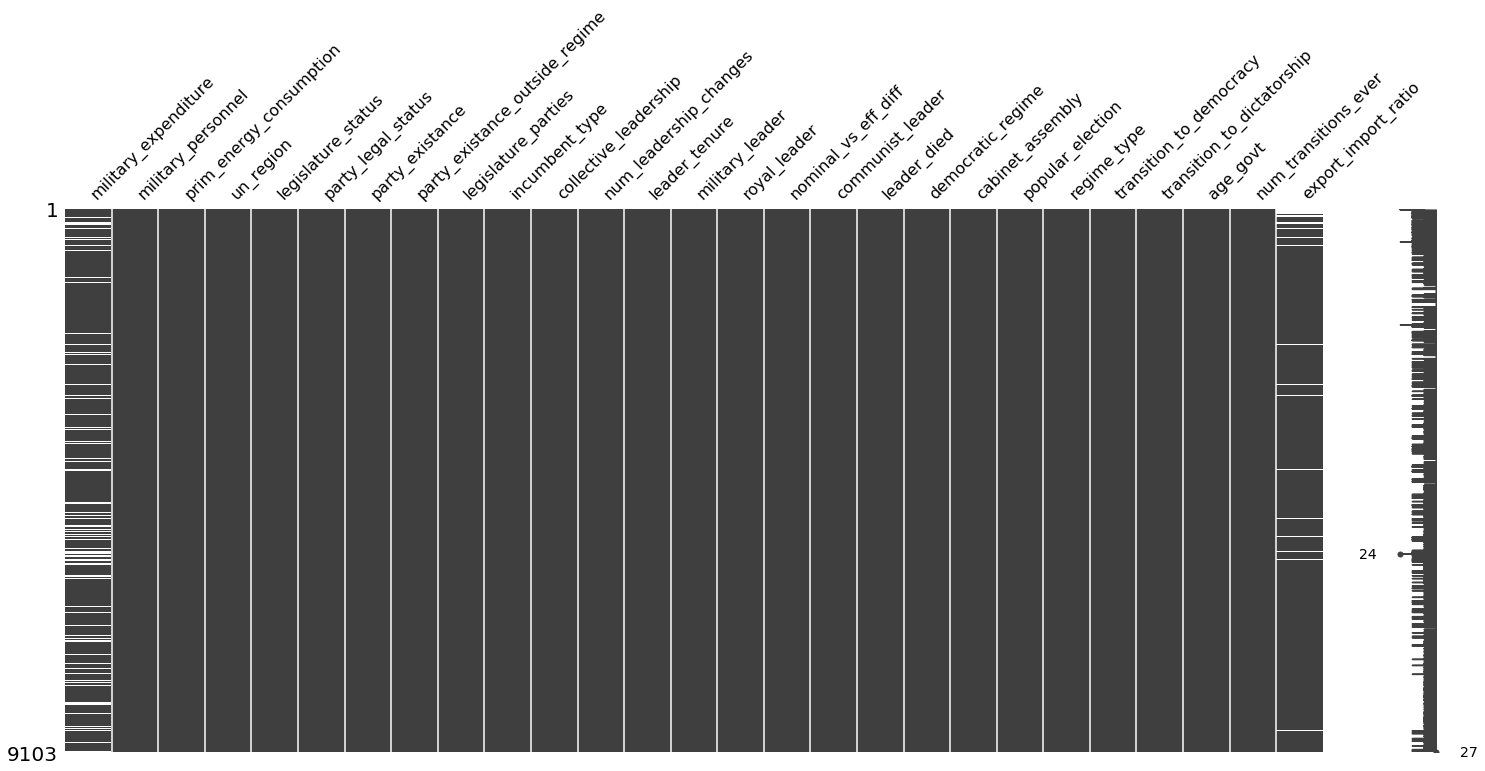

In [42]:
msno.matrix(df.drop(['cow_code', 'state_name', 'year', 'export_dollars',
                     'import_dollars', 'num_trade_states', 'cinc_score',
                     'total_pop', 'num_alliances', 'pre_1816_alliances',
                     'num_in_effect_1231_2012', 'defense_treaties',
                     'neutrality_treaties', 'nonaggression_treaties',
                     'entente_treaties', 'num_conflicts', 'avg_with', 'avg_against',
                     'avg_cum_duration', 'num_wars', 'origin_participant_pct',
                     'ongoing_2010', 'revision_pct', 'avg_hostility_level',
                     'revision_type_mode', 'outcome_mode', 'settlement_type_mode',
                     'majority_religion', 'un_continent', 'election_type',
                     'legislation_type'], axis = 1));

In [32]:
df.head()

,cow_code,state_name,year,num_trade_states,export_dollars,import_dollars,military_expenditure,military_personnel,prim_energy_consumption,total_pop,cinc_score,num_alliances,pre_1816_alliances,num_in_effect_1231_2012,defense_treaties,neutrality_treaties,nonaggression_treaties,entente_treaties,num_conflicts,avg_with,avg_against,avg_cum_duration,num_wars,origin_participant_pct,ongoing_2010,revision_pct,avg_hostility_level,revision_type_mode,outcome_mode,settlement_type_mode,majority_religion,un_region,un_continent,election_type,legislation_type,legislature_status,party_legal_status,party_existance,party_existance_outside_regime,legislature_parties,incumbent_type,collective_leadership,num_leadership_changes,leader_tenure,military_leader,royal_leader,nominal_vs_eff_diff,communist_leader,leader_died,democratic_regime,cabinet_assembly,popular_election,regime_type,transition_to_democracy,transition_to_dictatorship,age_govt,num_transitions_ever,export_import_ratio
0,2,United States of America,1946,65.00,160000000.00,0.00,45133984000.00,3030000.00,2376288000000.00,141389000.00,0.36,19.00,0.00,0.00,19.00,0.00,0.00,19.00,2.00,1.00,1.50,0.27,0.00,0.50,0.00,0.00,3.50,N/A,Stalemate,None Value,Christianity,Northern America,Americas,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,0.00,2.00,Yes,No,No,No,No,Yes,No,Yes,Presidential democracy,No,No,77.00,0.00,inf
1,651,Egypt,1946,65.00,0.00,0.00,31998000.00,50000.00,4046000000.00,18792000.00,0.01,7.00,0.00,0.00,0.00,0.00,6.00,7.00,0.00,nan,nan,0.00,0.00,nan,nan,nan,1.00,0,NaN,NaN,Islam,Northern Africa,Africa,Nonelective,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,0.00,11.00,No,Yes,No,No,No,No,No,No,Royal dictatorship,No,No,25.00,0.00,nan
2,135,Peru,1946,65.00,0.00,0.00,26446000.00,38000.00,2166000000.00,7420000.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,19.00,0.00,nan,nan,0.00,0.00,nan,nan,nan,1.00,0,NaN,NaN,Christianity,South America,Americas,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,0.00,2.00,No,No,No,No,No,Yes,No,Yes,Presidential democracy,No,No,8.00,0.00,nan
3,652,Syria,1946,65.00,0.00,0.00,14540000.00,10000.00,10000000.00,2978000.00,0.00,6.00,0.00,4.00,0.00,0.00,6.00,6.00,0.00,nan,nan,0.00,0.00,nan,nan,nan,1.00,0,NaN,NaN,Islam,Western Asia,Asia,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,0.00,4.00,No,No,No,No,No,No,No,No,Civilian dictatorship,No,No,1.00,0.00,nan
4,660,Lebanon,1946,65.00,0.00,0.00,5111000.00,4000.00,16000000.00,1156000.00,0.00,6.00,0.00,4.00,0.00,0.00,6.00,6.00,0.00,nan,nan,0.00,0.00,nan,nan,nan,1.00,0,NaN,NaN,Christianity,Western Asia,Asia,Indirect election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,2.00,1.00,No,No,No,No,No,Yes,No,No,Parliamentary democracy,Yes,No,1.00,0.00,nan


In [33]:
df.to_pickle('pickle/df_imputed.pkl')
df.to_csv('dataframe_exports/df_imputed.csv')

In [34]:
df = pd.read_pickle('pickle/df_imputed.pkl')